# Data Exploration

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## a)

In [4]:
#load data
df=pd.read_csv('../insurance_orig.csv')

display(df.head())

,age,sex,bmi,children,smoker,region,charges
0,23.0,male,23.845,0.0,no,northeast,2395.17155
1,60.0,female,36.005,0.0,no,northeast,13228.84695
2,34.0,female,31.920,1.0,yes,northeast,37701.87680
3,19.0,female,28.600,5.0,no,southwest,4687.79700
4,19.0,male,20.425,0.0,no,northwest,1625.43375


In [5]:
rows, cols = df.shape
print(f"Number of rows: {rows}")
print(f"Number of columns: {cols}")

Number of rows: 1349
Number of columns: 7


## b)

In [6]:
df.describe()

,age,bmi,children,charges
count,1348.000000,1347.000000,1348.000000,1347.000000
mean,39.228487,30.655499,1.103858,13254.716622
std,14.063585,6.085427,1.217132,12096.109347
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.315000,0.000000,4742.306100
50%,39.000000,30.360000,1.000000,9377.904700
75%,51.000000,34.637500,2.000000,16582.138605
max,64.000000,53.130000,7.000000,63770.428010


## c)

In [7]:
df_noNa=df.dropna()
display(df_noNa.head())
rows, cols = df_noNa.shape
print(f"Number of rows: {rows}")
print(f"Number of columns: {cols}")

,age,sex,bmi,children,smoker,region,charges
0,23.0,male,23.845,0.0,no,northeast,2395.17155
1,60.0,female,36.005,0.0,no,northeast,13228.84695
2,34.0,female,31.920,1.0,yes,northeast,37701.87680
3,19.0,female,28.600,5.0,no,southwest,4687.79700
4,19.0,male,20.425,0.0,no,northwest,1625.43375


Number of rows: 1338
Number of columns: 7


## d)

In [8]:
bins=[0,18.5,25,30,np.inf]
labels=["underweight",'normal','overweight','obese']
df['bmi_class']=pd.cut(
    df['bmi'],
    labels=labels,
    bins=bins,
    right=False,
    include_lowest=True,
)
display(df['bmi_class'].head())

# count patients in different BMI
counts = df["bmi_class"].value_counts(dropna=False)
pct = (counts / len(df_noNa) * 100).round(2)
display(df.head())
print(counts)
print(pct)


0        normal
1         obese
2         obese
3    overweight
4        normal
Name: bmi_class, dtype: category
Categories (4, object): ['underweight' < 'normal' < 'overweight' < 'obese']

,age,sex,bmi,children,smoker,region,charges,bmi_class
0,23.0,male,23.845,0.0,no,northeast,2395.17155,normal
1,60.0,female,36.005,0.0,no,northeast,13228.84695,obese
2,34.0,female,31.920,1.0,yes,northeast,37701.87680,obese
3,19.0,female,28.600,5.0,no,southwest,4687.79700,overweight
4,19.0,male,20.425,0.0,no,northwest,1625.43375,normal


bmi_class
obese          710
overweight     392
normal         225
underweight     20
NaN              2
Name: count, dtype: int64
bmi_class
obese          53.06
overweight     29.30
normal         16.82
underweight     1.49
NaN             0.15
Name: count, dtype: float64


## e)

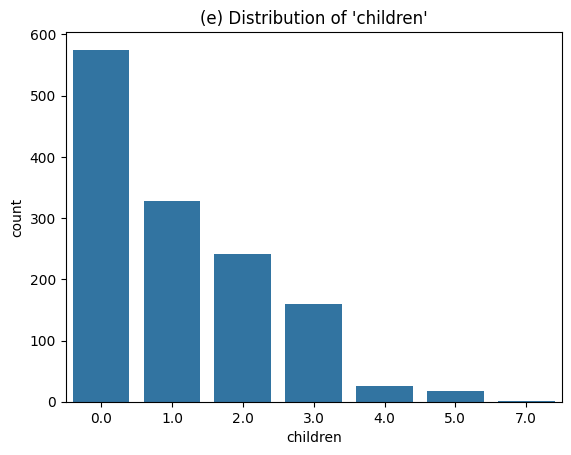

(e) mode of children = [0.0]


,count
children,
0.0,575
1.0,328
2.0,241
3.0,159
4.0,26
5.0,18
7.0,1


In [9]:
# 1) countplot
ax = sns.countplot(data=df, x="children")
ax.set_title("(e) Distribution of 'children'")
ax.set_xlabel("children")
ax.set_ylabel("count")
plt.show()

# 2) Mode
modes = df["children"].mode(dropna=True).tolist()


 # 3)
counts = df["children"].value_counts()

print(f"(e) mode of children = {modes}")
display(counts.to_frame(name="count"))


## f)

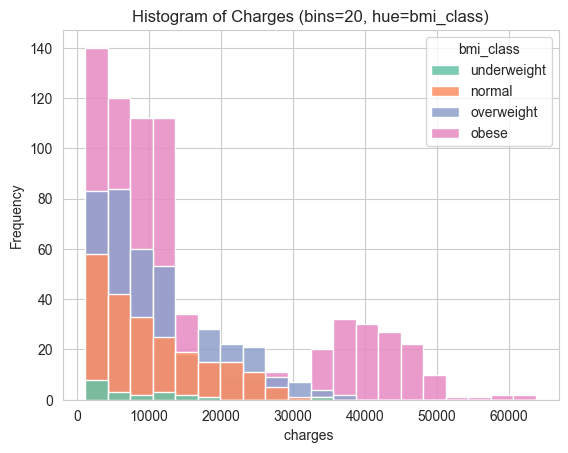

This is Equal-width binning


In [30]:
bins_used=20
ax=sns.histplot(data=df, x="charges",bins=bins_used,hue="bmi_class",palette="Set2", alpha=0.85)
ax.set_title(f"Histogram of Charges (bins={bins_used}, hue=bmi_class)")
ax.set_xlabel("charges ")
ax.set_ylabel("Frequency")
plt.show()
print("This is Equal-width binning")

## g)

In [37]:
#From the histogram, the overall distribution is right-skewed with a long tail, and individuals with high charges are predominantly in the obese group. There is a positive (but not deterministic) relationship between BMI and charges.

可以，从直方图可以看出整体呈现右偏长尾，且高charges人群基本都是obese 肥胖人群。BMI和charges呈现一定的正相关关系，但不绝对。


## h)

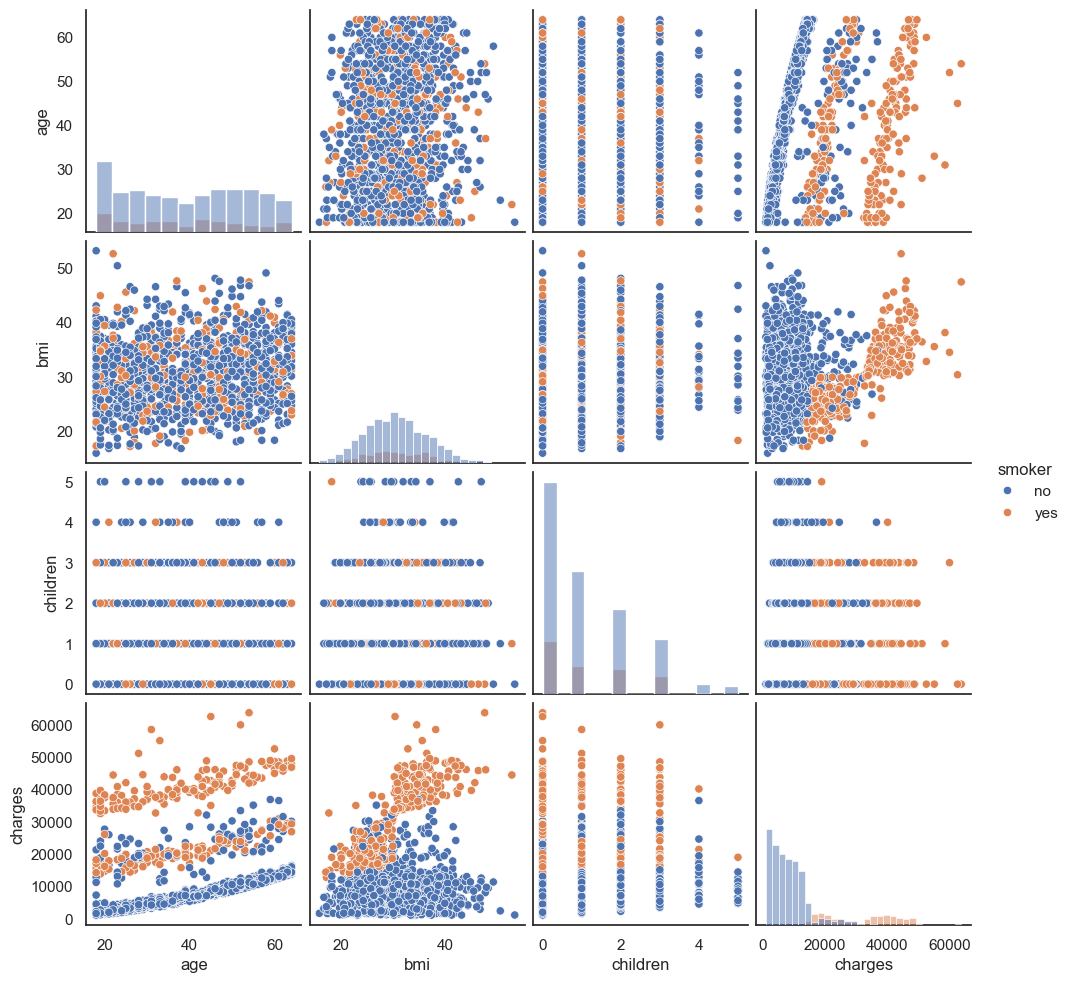

In [46]:
num_cols = ["age", "bmi", "children", "charges"]

sns.set_theme(style="white", context="notebook")
ax= sns.pairplot(
    data=df,
    vars=num_cols,
    hue="smoker",                  # 题目要求
    diag_kind="hist",              # 对角线直方图
)
plt.show()

## i)

,age,bmi,children,charges
age,1.000,0.106,0.044,0.300
bmi,0.106,1.000,0.012,0.197
children,0.044,0.012,1.000,0.062
charges,0.300,0.197,0.062,1.000


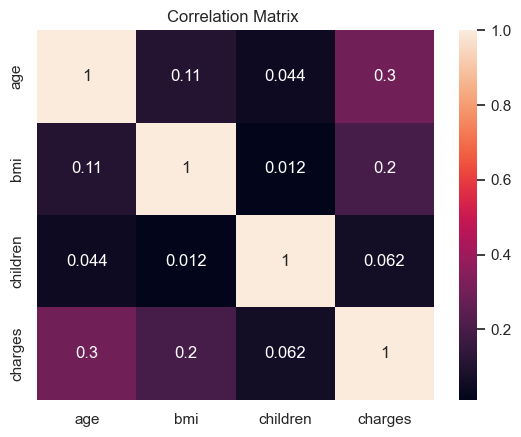

<class 'pandas.core.frame.DataFrame'>
 strongest correlation age – charges, r = 0.300


In [52]:

# 1) correlation matrix
corr = df.corr(numeric_only=True).round(3)
display(corr)

# 2) heatmap
sns.set_theme(style="white", context="notebook")
ax = sns.heatmap(corr,annot=True)
ax.set_title("Correlation Matrix ")
plt.show()

# 3)  strongest absolute correlation
corr_abs = corr.abs()
print(type(corr_abs))
np.fill_diagonal(corr_abs.values, -np.inf)       # 排除对角线的1.0
max_pair = np.unravel_index(np.argmax(corr_abs.values), corr_abs.shape)
feat1, feat2 = corr_abs.index[max_pair[0]], corr_abs.columns[max_pair[1]]
max_val  = corr.loc[feat1, feat2]

print(f" strongest correlation {feat1} – {feat2}, r = {max_val:.3f}")

## j)